# Theory
The state prepared on the 0th qubit:
$$
\newcommand{\ket}[1]{\left|#1\right\rangle}
\ket{\psi_0}=\cos\frac{\theta}{2}\ket{0}+\sin\frac{\theta}{2}\ket{1}
$$

What will be measured:
$$
\newcommand{\braket}[2]{\left\langle #1\ | \ #2\right\rangle}
\alpha=\left|\braket{0}{\psi_0}\right|^2=\cos^2\frac{\theta}{2}\\
\beta=\left|\braket{1}{\psi_0}\right|^2=\sin^2\frac{\theta}{2}
$$


The state prepared on all 3 qubits:
\begin{align}
\newcommand{\ket}[1]{\left|#1\right\rangle}
\ket{\psi}=\left(\cos\frac{\theta}{2}\ket{0}+\sin\frac{\theta}{2}\ket{1}\right)\otimes\frac{1}{\sqrt{2}}(\ket{00}+\ket{11})=\\
=\frac{1}{2}\frac{1}{\sqrt{2}}(\ket{00}+\ket{11})\otimes\left(\cos\frac{\theta}{2}\ket{0}+\sin\frac{\theta}{2}\ket{1}\right)\\
+\frac{1}{2}\frac{1}{\sqrt{2}}(\ket{00}-\ket{11})\otimes\left(\cos\frac{\theta}{2}\ket{0}-\sin\frac{\theta}{2}\ket{1}\right)\\
+\frac{1}{2}\frac{1}{\sqrt{2}}(\ket{01}+\ket{10})\otimes\left(\sin\frac{\theta}{2}\ket{0}+\cos\frac{\theta}{2}\ket{1}\right)\\
+\frac{1}{2}\frac{1}{\sqrt{2}}(\ket{01}-\ket{10})\otimes\left(\sin\frac{\theta}{2}\ket{0}-\cos\frac{\theta}{2}\ket{1}\right)
\end{align}

Therefore:
$$
\newcommand{\braket}[2]{\left\langle #1\ | \ #2\right\rangle}
\alpha=\left|\braket{000}{\psi}\right|^2+\left|\braket{110}{\psi}\right|^2+\left|\braket{011}{\psi}\right|^2+\left|\braket{101}{\psi}\right|^2\\
\beta=\left|\braket{001}{\psi}\right|^2+\left|\braket{111}{\psi}\right|^2+\left|\braket{010}{\psi}\right|^2+\left|\braket{100}{\psi}\right|^2
$$


# Extracting data

In [1]:
import sys
sys.path.append('../jobDataGatherer')
sys.path.append('../')
from check_QE import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
jobs=get_done_jobs(0)
jobs=[j for j in jobs if j['creationDate']>'2018-07-10T1']##The date when teleportation.py was corrected
print('Number of jobs: '+ str(len(jobs)))

Number of jobs: 364


In [3]:
from collections import Counter
Counter([j['backend']['name'] for j in jobs])

Counter({'ibmqx4': 190, 'ibmqx5': 174})

In [4]:
data=filter_jobs_data(jobs)

In [5]:
data=pd.DataFrame.from_dict(data)

Every job consists of 20 circuits: 1 test circuit and 1 teleportation circuit for 10 different degrees $\theta \in [0;\pi]$

In [6]:
data['theta']=np.tile(np.repeat(np.linspace(0,np.pi,10),2),int(data.shape[0]/20))
data['job']=np.tile(['test','teleport'],int(data.shape[0]/2))
data['index']=np.repeat(range(int(data.shape[0]/20)),20)
data.head()

,backend_name,date,results,theta,job,index
0,ibmqx4,2018-07-12T10:17:27.516Z,"{'00000': 990, '00001': 8, '00010': 18, '00100...",0.000000,test,0
1,ibmqx4,2018-07-12T10:17:27.618Z,"{'00000': 456, '00001': 6, '00010': 28, '00100...",0.000000,teleport,0
2,ibmqx4,2018-07-12T10:17:27.736Z,"{'00000': 956, '00001': 35, '00010': 12, '0010...",0.349066,test,0
3,ibmqx4,2018-07-12T10:17:27.784Z,"{'00000': 468, '00001': 17, '00010': 21, '0001...",0.349066,teleport,0
4,ibmqx4,2018-07-12T10:17:27.892Z,"{'00000': 887, '00001': 106, '00010': 15, '001...",0.698132,test,0


Extracting counts from dictionaries:

In [7]:
results=data.results.apply(pd.Series)
results=results.fillna(0)
results.head()

,00000,0000000000000000,0000000000000001,0000000000000010,0000000000000011,0000000000000100,0000000000000101,0000000000000110,0000000000000111,00001,...,00110,00111,1000000000000000,1000000000000001,1000000000000010,1000000000000011,1000000000000100,1000000000000101,1000000000000110,1000000000000111
0,990.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,456.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,...,481.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,956.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,468.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,...,437.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,887.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Diagnostic plots to guess which qubit is which:

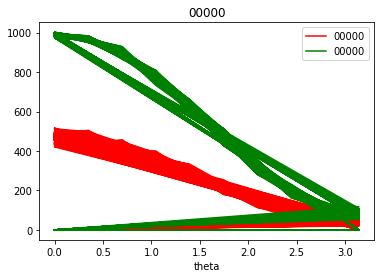

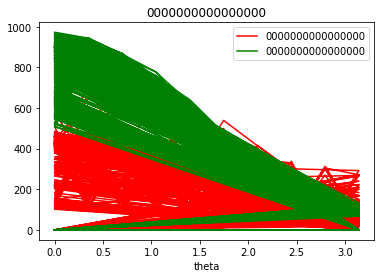

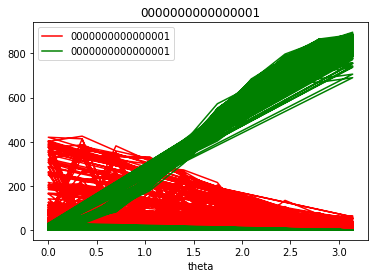

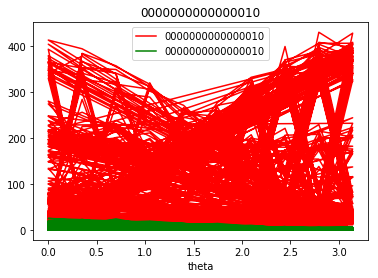

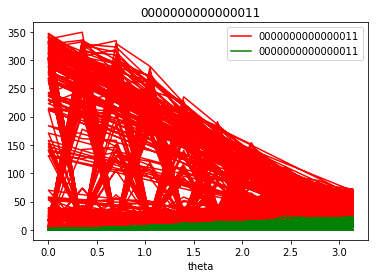

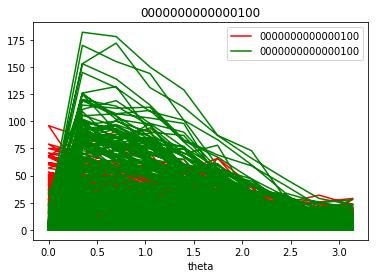

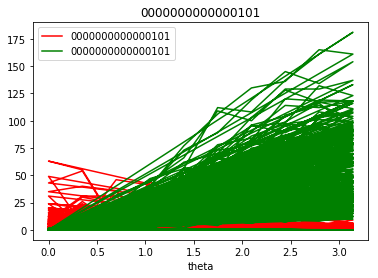

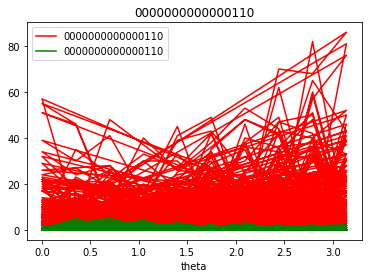

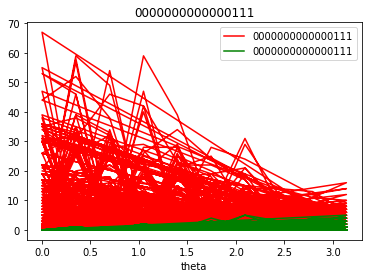

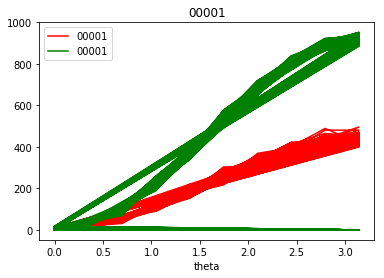

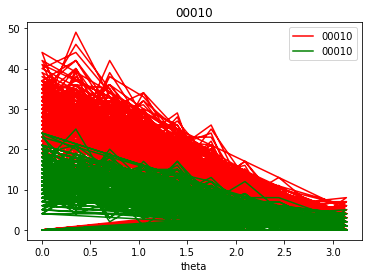

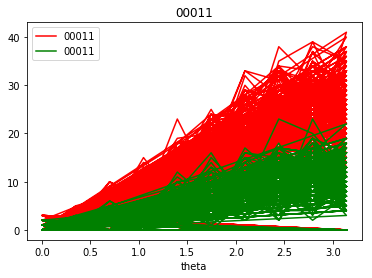

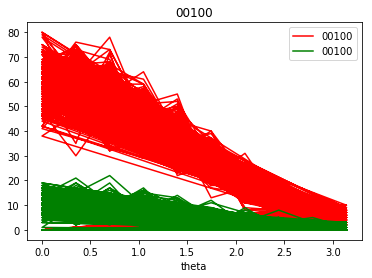

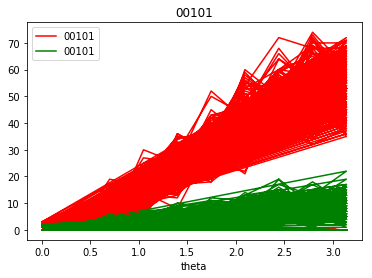

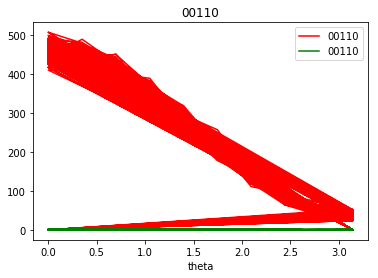

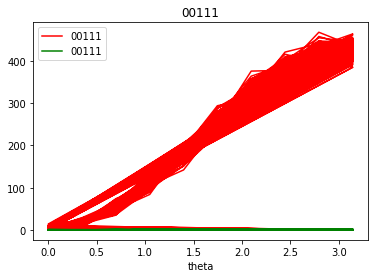

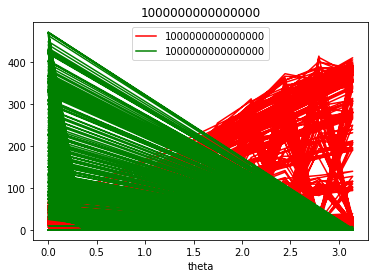

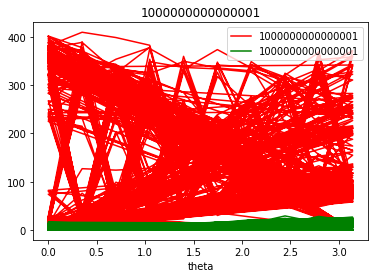

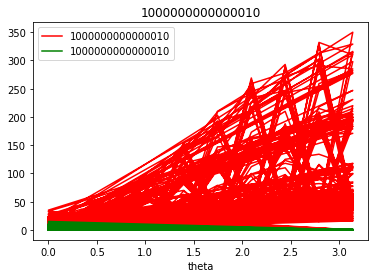

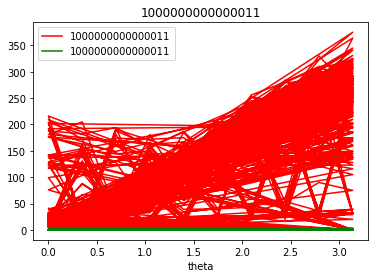

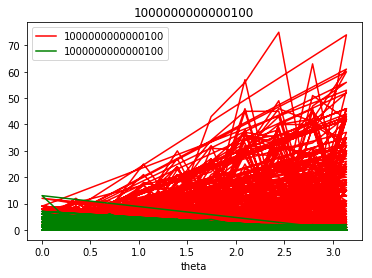

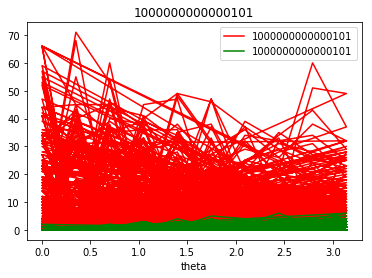

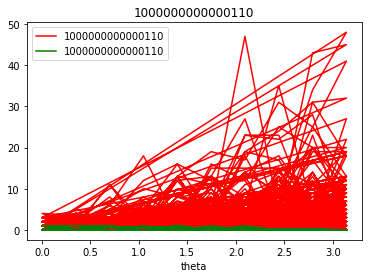

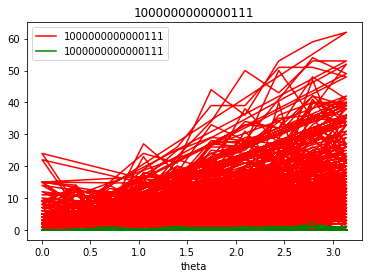

In [8]:
keys=list(results)
results['theta']=np.tile(np.repeat(np.linspace(0,np.pi,10),2),int(data.shape[0]/20))
results['job']=np.tile(['test','teleport'],int(data.shape[0]/2))
color={'test':'green','teleport':'red'}
for key in keys:
    f,a=plt.subplots()
    for k,group in results.groupby('job'):
        group.plot(x='theta',y=key,c=color[k],title=key,ax=a)
    plt.show()

Guess:

ibmqx5: t000000000000xyz

z=q[0]

y=q[1]

t=q[2]

x=error

ibmqx4: 00abc

c=q[0]

b=q[1]

a=q[2]

Adding counts to data frame, column name = $q_0*q_1*q_2$, where $q_i \in \{0,1\}$ is the state measured on $i$-th qubit:

In [9]:
data['X000']=results['0000000000000000']+results['0000000000000100']+results['00000']
data['X001']=results['1000000000000000']+results['1000000000000100']+results['00100']
data['X010']=results['0000000000000010']+results['0000000000000110']+results['00010']
data['X011']=results['1000000000000010']+results['1000000000000110']+results['00110']
data['X100']=results['0000000000000001']+results['0000000000000101']+results['00001']
data['X101']=results['1000000000000001']+results['1000000000000101']+results['00101']
data['X110']=results['0000000000000011']+results['0000000000000111']+results['00011']
data['X111']=results['1000000000000011']+results['1000000000000111']+results['00111']

Extracting measured $\alpha$ and $\beta$:

In [10]:
test_data=data.query('job=="test"')
teleport_data=data.query('job=="teleport"')
test_data['alpha']=test_data.X000+test_data.X001+test_data.X010+test_data.X011
test_data['beta']=test_data.X100+test_data.X101+test_data.X110+test_data.X111
teleport_data['alpha']=teleport_data.X000+teleport_data.X110+teleport_data.X011+teleport_data.X101
teleport_data['beta']=teleport_data.X001+teleport_data.X111+teleport_data.X100+teleport_data.X010

C:\Users\Alicja\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Alicja\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Alicja\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

Aggregating data:

In [11]:
agg_data=teleport_data[['backend_name','date','theta','index','alpha','beta']]
agg_data=agg_data.rename(columns={'backend_name':'backend'})
agg_data['alpha']=agg_data['alpha']/1024
agg_data['beta']=agg_data['beta']/1024
agg_data=agg_data.assign(
    alpha_test=list(test_data.alpha/1024),
    beta_test=list(test_data.beta/1024),
    alpha_theory=np.cos(agg_data.theta/2)**2,
    beta_theory=np.sin(agg_data.theta/2)**2
)
agg_data.head()

,backend,date,theta,index,alpha,beta,alpha_test,beta_test,alpha_theory,beta_theory
1,ibmqx4,2018-07-12T10:17:27.618Z,0.000000,0,0.915039,0.084961,0.992188,0.007812,1.000000,0.000000
3,ibmqx4,2018-07-12T10:17:27.784Z,0.349066,0,0.886719,0.113281,0.964844,0.035156,0.969846,0.030154
5,ibmqx4,2018-07-12T10:17:28.053Z,0.698132,0,0.817383,0.182617,0.892578,0.107422,0.883022,0.116978
7,ibmqx4,2018-07-12T10:17:28.182Z,1.047198,0,0.717773,0.282227,0.767578,0.232422,0.750000,0.250000
9,ibmqx4,2018-07-12T10:17:28.369Z,1.396263,0,0.597656,0.402344,0.647461,0.352539,0.586824,0.413176


In [12]:
agg_data.to_csv('teleportation_data.csv',index=False)